In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans


In [2]:
# dictionary of title_Id -> title_name
fp=open("title_Id.txt",'r')

titleId_titleName={}
for line in fp:
    line=line.strip().split('#')
    #print line[0], line[1]
    if len(line)!=2:
        if len(line)>2:
            key=line[-1]
            value=""
            for i in range(len(line)-1):
                value=value+line[i]
            titleId_titleName[key]=value 
    else:
        titleId_titleName[line[1]]=line[0]

fp.close()

    

In [3]:
# dictionary of journal_Id -> journal_name
fp=open("journal_Id.txt",'r')

journalId_JournalName={}
for line in fp:
    line=line.strip().split("#")
    journalId_JournalName[line[1]]=line[0]

fp.close()

In [4]:
# dictionary of author_Id -> author_name
fp= open("author_Id.txt",'r')

authorId_authorName={}
for line in fp:
    line = line.strip().split("#")
    authorId_authorName[line[1]]=line[0]
fp.close()

In [5]:
fp= open("title_Journal_Author.txt",'r')

authorList=[]
titleJournalList=[]
for line in fp:
    line = line.strip().split("#")
    curr= titleId_titleName[line[0]] + " " + journalId_JournalName[line[1]]
    titleJournalList.append(curr)
    tempList=line[2].strip().split('|') #author ids list
    tempNameList=[] #authors namelist
    for i in tempList:
        tempNameList.append(authorId_authorName[i])
    authorList.append(tempNameList)
    
fp.close()

In [6]:
#print len(authorList)
#print len(titleJournalList)
#print authorList[2], titleJournalList[2]


In [7]:
# to find a no. of unique words
vocab={}
for line in titleJournalList:
    wordList=line.strip().split()
    for word in wordList:
        if word in vocab:
            vocab[word]=vocab[word]+1
        else:
            vocab[word]=1

print len(vocab)

125296


In [8]:
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = 'english', max_features = 70000)
vec=vectorizer.fit(titleJournalList)
vectorized=vec.transform(titleJournalList)



In [9]:
#print vectorizer

In [10]:
#print type(vectorized)

In [14]:

cluster_size=20
km = KMeans(n_clusters=cluster_size, init='k-means++', max_iter=100, n_init=1)
km.fit(vectorized)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=20, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(cluster_size):
    print "Cluster %d:" % i,
    for ind in order_centroids[i, :10]:
        print ' %s' % terms[ind],
    print

Top terms per cluster:
Cluster 0:  comput  technol  sci  based  algorithm  model  networks  data  approach  using
Cluster 1:  ieee  trans  syst  vlsi  learning  neural  netw  power  based  design
Cluster 2:  graph  theory  journal  graphs  number  cycles  logic  formal  dame  chromatic
Cluster 3:  model  math  log  based  physics  image  comput  processing  graphical  using
Cluster 4:  neural  networks  ieee  transactions  network  learning  using  based  time  control
Cluster 5:  wireless  networks  sensor  mobile  computing  communications  ijdsn  ad  hoc  based
Cluster 6:  systems  journal  fuzzy  automatica  intelligent  computers  circuits  control  based  operating
Cluster 7:  ieee  trans  data  software  eng  knowl  education  systems  based  using
Cluster 8:  physics  computing  comput  based  computer  reliability  logic  using  microelectronics  journal
Cluster 9:  future  syst  generation  comp  using  resource  grids  data  based  grid
Cluster 10:  decision  support  system

In [16]:
authorClusters={} # Cluster Id to List of authorName
for i in range(len(titleJournalList)):
    currList=[]
    currList.append(titleJournalList[i])
    data_features=vec.transform(currList)
    labels=km.predict(data_features)
    
    clusterId=labels[0]
    curAuthorsList=authorList[i] #authors list for current article
    if clusterId in authorClusters.keys():
        #fetch the existing list of authors for the clusterId
        tempList=authorClusters[clusterId]
        for j in curAuthorsList:
            tempList.append(j)
            
        #update authorsClusters with updated authors list
        authorClusters[clusterId]=tempList
        
    else: #create a new key with the new cluster id and make value list of authors for the current article
        authorClusters[clusterId]=curAuthorsList

# print clusters Id-> author ids



In [32]:
fp=open("Kmeans_countVectorizer_output","wr")

for i in authorClusters.keys():
    outstr=str(i) + " => " + str(authorClusters[i])
    fp.write(outstr+"\n")
    fp.write("**************************************************************************************************************************"+"\n")
fp.close()


In [33]:
%matplotlib inline

In [36]:
print (len(titleJournalList))

144686


In [41]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, pairwise

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


In [71]:
range_n_clusters = [10,20,50,70,100,130,150,170,200]

In [72]:
valueList=[]

In [73]:
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, n_init=1,random_state=10)
    cluster_labels = km.fit_predict(vectorized)
    silhouette_avg = silhouette_score(vectorized, cluster_labels, metric='euclidean',sample_size=10000)
    valueList.append(silhouette_avg)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 10 The average silhouette_score is : 0.0237763298455
For n_clusters = 20 The average silhouette_score is : 0.0154335435047
For n_clusters = 50 The average silhouette_score is : 0.0312965868245
For n_clusters = 70 The average silhouette_score is : 0.00290032359299
For n_clusters = 100 The average silhouette_score is : 0.0010788984768
For n_clusters = 130 The average silhouette_score is : 0.0112553029015
For n_clusters = 150 The average silhouette_score is : 0.0151048619907
For n_clusters = 170 The average silhouette_score is : 0.0118369072063
For n_clusters = 200 The average silhouette_score is : 0.0138124906216


In [75]:
valueList_15000=[]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, n_init=1,random_state=10)
    cluster_labels = km.fit_predict(vectorized)
    silhouette_avg = silhouette_score(vectorized, cluster_labels, metric='euclidean',sample_size=15000)
    valueList_15000.append(silhouette_avg)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 10 The average silhouette_score is : 0.0207411443607
For n_clusters = 20 The average silhouette_score is : 0.0182702724563
For n_clusters = 50 The average silhouette_score is : 0.0343891621179
For n_clusters = 70 The average silhouette_score is : 0.00227763476668
For n_clusters = 100 The average silhouette_score is : 0.00263053653512
For n_clusters = 130 The average silhouette_score is : 0.0198805833876
For n_clusters = 150 The average silhouette_score is : 0.0213326772462
For n_clusters = 170 The average silhouette_score is : 0.0180481606536
For n_clusters = 200 The average silhouette_score is : 0.0161160082673


In [76]:
valueList_5000=[]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, n_init=1,random_state=10)
    cluster_labels = km.fit_predict(vectorized)
    silhouette_avg = silhouette_score(vectorized, cluster_labels, metric='euclidean',sample_size=5000)
    valueList_5000.append(silhouette_avg)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 10 The average silhouette_score is : 0.025877574447
For n_clusters = 20 The average silhouette_score is : 0.012272768688
For n_clusters = 50 The average silhouette_score is : 0.0324678006353
For n_clusters = 70 The average silhouette_score is : 0.0109729691681
For n_clusters = 100 The average silhouette_score is : 0.00172382080369
For n_clusters = 130 The average silhouette_score is : 0.00580957050039
For n_clusters = 150 The average silhouette_score is : 0.0210882216668
For n_clusters = 170 The average silhouette_score is : 0.0152228527141
For n_clusters = 200 The average silhouette_score is : 0.000297259452888


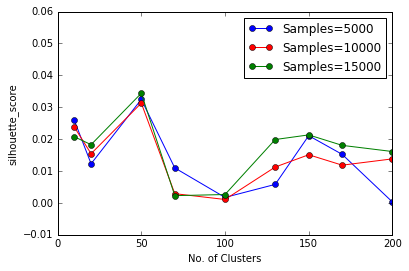

In [81]:
import matplotlib.pyplot as plt

plt.axis([0,200,-0.01,0.06])
plt.xlabel('No. of Clusters')
plt.ylabel('silhouette_score')

plt.plot(range_n_clusters,valueList_5000,color='b',marker='o',label='Samples=5000')
plt.plot(range_n_clusters,valueList,color='r',marker='o',label='Samples=10000')
plt.plot(range_n_clusters,valueList_15000,color='g',marker='o',label='Samples=15000')

plt.legend()
plt.show()